In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'school_grades.csv'
data = pd.read_csv(file_path);
df = data;

In [9]:
def final_result(row):
    result = 'Fail'
    result_list = [row['math_result'], row['reading_result'], row['writing_result']]
    if result_list.count('Pass') == 3:
        result = 'Pass'
    else:
        result = 'Fail'
    return result

def calculate_result():
    df['math_result'] = df.apply(lambda row: "Pass" if row['math score'] >= 65 else "Fail", axis=1)
    df['reading_result'] = df.apply(lambda row: "Pass" if row['reading score'] >= 65 else "Fail", axis=1)
    df['writing_result'] = df.apply(lambda row: "Pass" if row['writing score'] >= 65 else "Fail", axis=1)
    df['final_result'] = df.apply(final_result, axis=1)

def plot_chart(my_df, title):
    my_df.plot(
    kind='bar',
    color=['blue', 'green', 'red'],
    figsize=(15,10))
    plt.ylabel('Count') 
    plt.xlabel('Parental Level of Education') 
    plt.title(f'{title} statistics by Parental LOE')
    plt.show()

def combine_dfs(total_df, pass_df, fail_df):
    combined_df1 = pd.merge(total_df, pass_df, on='parental level of education')
    combined_df = pd.merge(combined_df1, fail_df, on='parental level of education')
    return combined_df

In [10]:
calculate_result()

df['parental level of education'] = df['parental level of education'].replace({
    'some high school': 'school, some high',
    'high school': 'school, high',
    "associate's degree": "degree, associate's",
    "bachelor's degree": "degree, bachelor's",
    "master's degree": "degree, master's" 
})

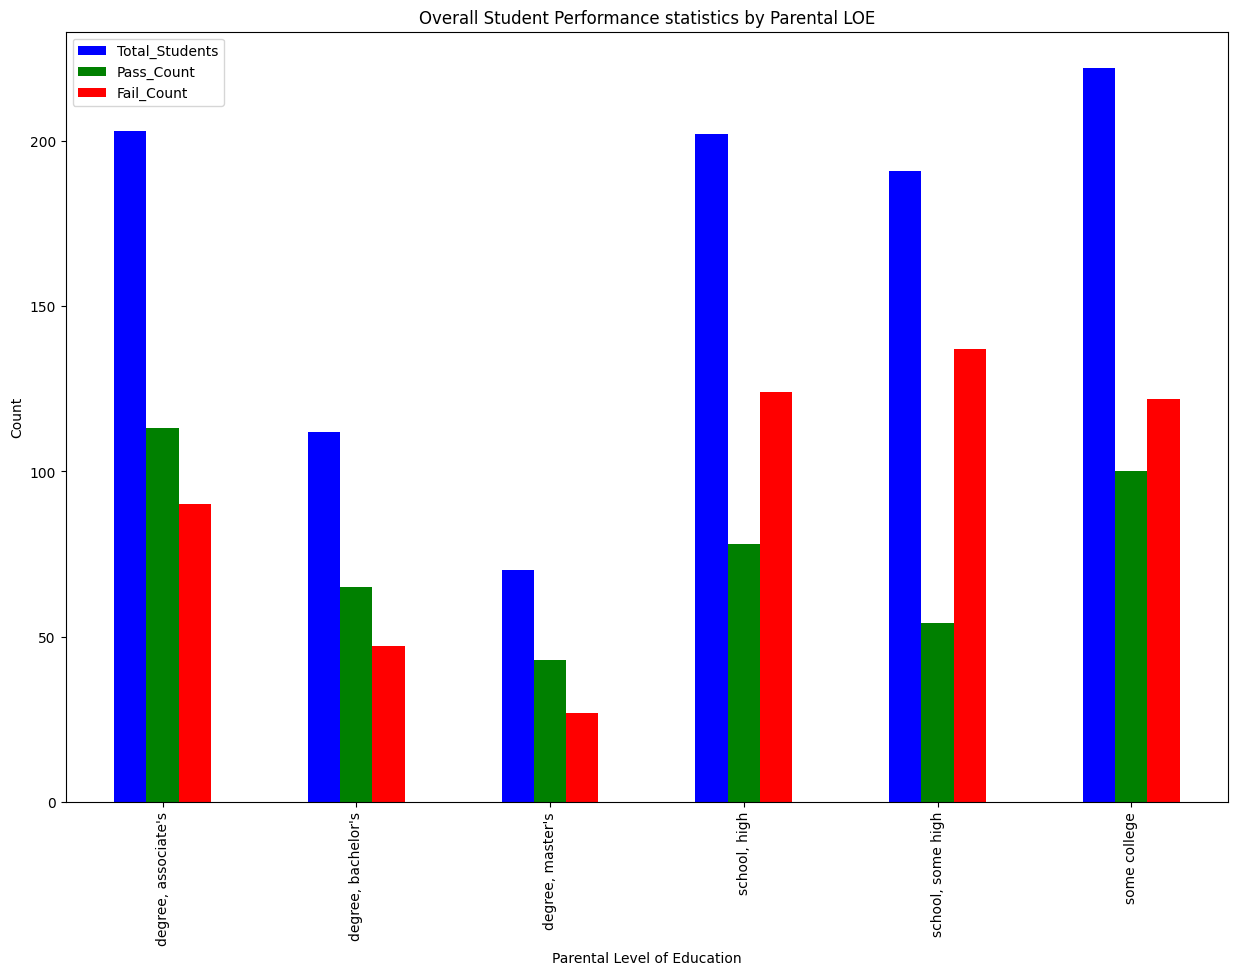

In [11]:
pass_df = df.loc[df['final_result'] == 'Pass', ['parental level of education', 'final_result']]
pass_df_count = pass_df.groupby(['parental level of education','final_result']).agg(Pass_Count = ('final_result', 'count'))
fail_df = df.loc[df['final_result'] == 'Fail', ['parental level of education', 'final_result']]
fail_df_count = fail_df.groupby(['parental level of education','final_result']).agg(Fail_Count = ('final_result', 'count'))
total_df_count = df.groupby(['parental level of education']).agg(Total_Students = ('final_result', 'count'))
plot_chart(combine_dfs(total_df_count, pass_df_count, fail_df_count),
            'Overall Student Performance')

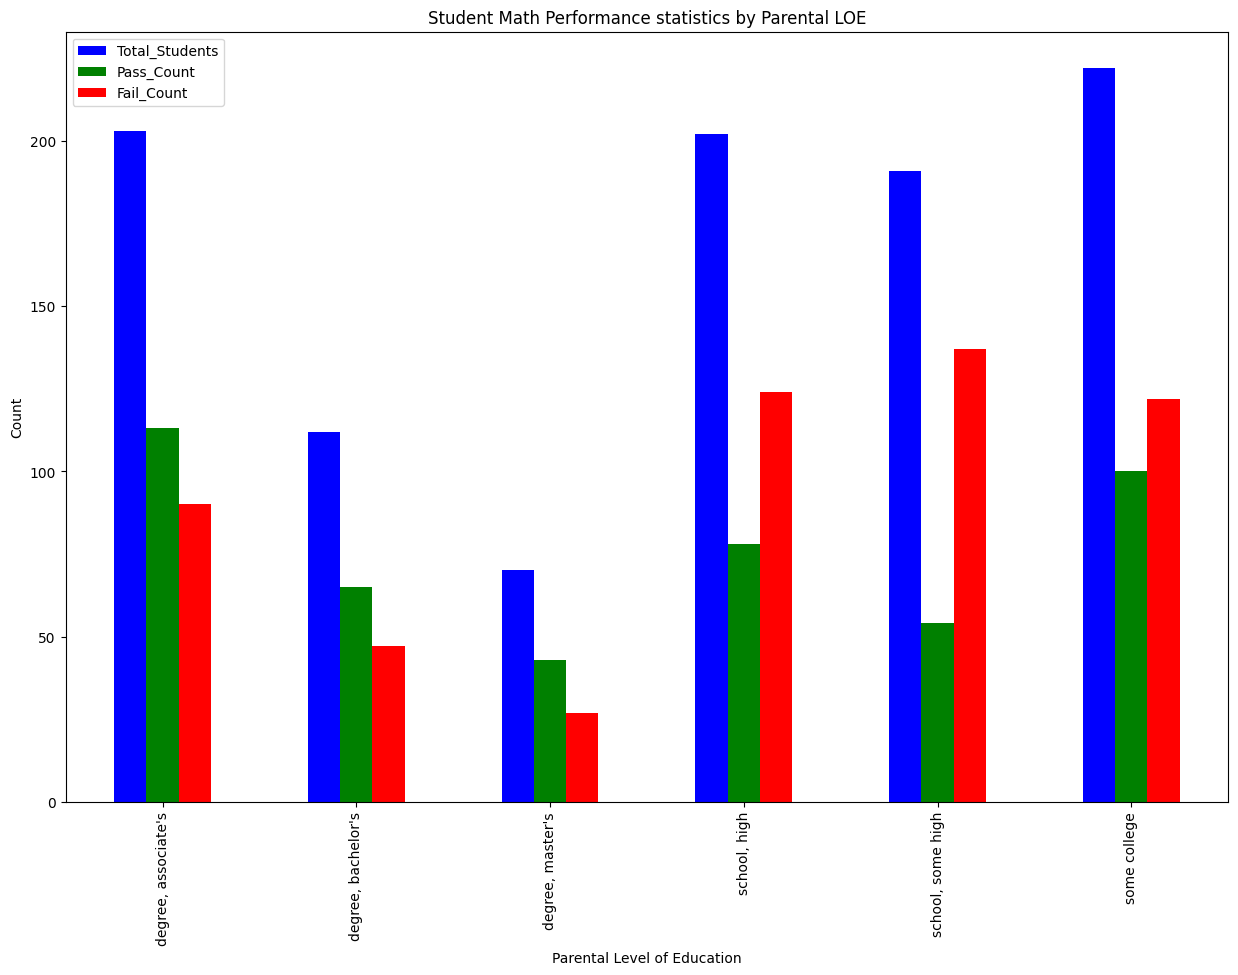

In [12]:
math_pass_df = df.loc[df['math_result'] == 'Pass', ['parental level of education', 'final_result']]
math_pass_df_count = pass_df.groupby(['parental level of education','final_result']).agg(Pass_Count = ('final_result', 'count'))
math_fail_df = df.loc[df['math_result'] == 'Fail', ['parental level of education', 'final_result']]
math_fail_df_count = fail_df.groupby(['parental level of education','final_result']).agg(Fail_Count = ('final_result', 'count'))
plot_chart(combine_dfs(total_df_count, math_pass_df_count, math_fail_df_count),
            'Student Math Performance')

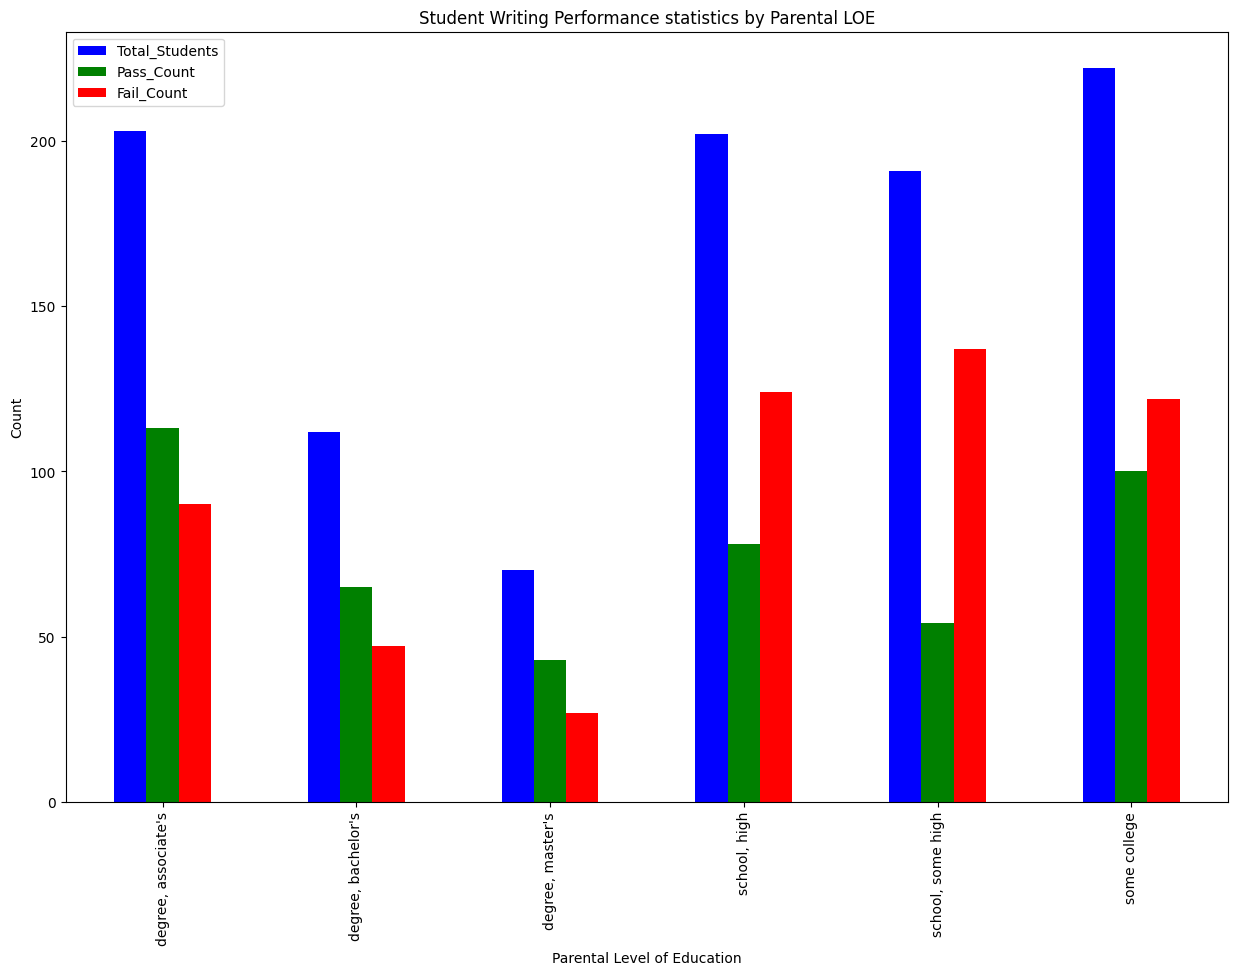

In [13]:
writing_pass_df = df.loc[df['writing_result'] == 'Pass', ['parental level of education', 'final_result']]
writing_pass_df_count = pass_df.groupby(['parental level of education','final_result']).agg(Pass_Count = ('final_result', 'count'))
writing_fail_df = df.loc[df['writing_result'] == 'Fail', ['parental level of education', 'final_result']]
writing_fail_df_count = fail_df.groupby(['parental level of education','final_result']).agg(Fail_Count = ('final_result', 'count'))
plot_chart(combine_dfs(total_df_count, writing_pass_df_count, writing_fail_df_count),
            'Student Writing Performance') 

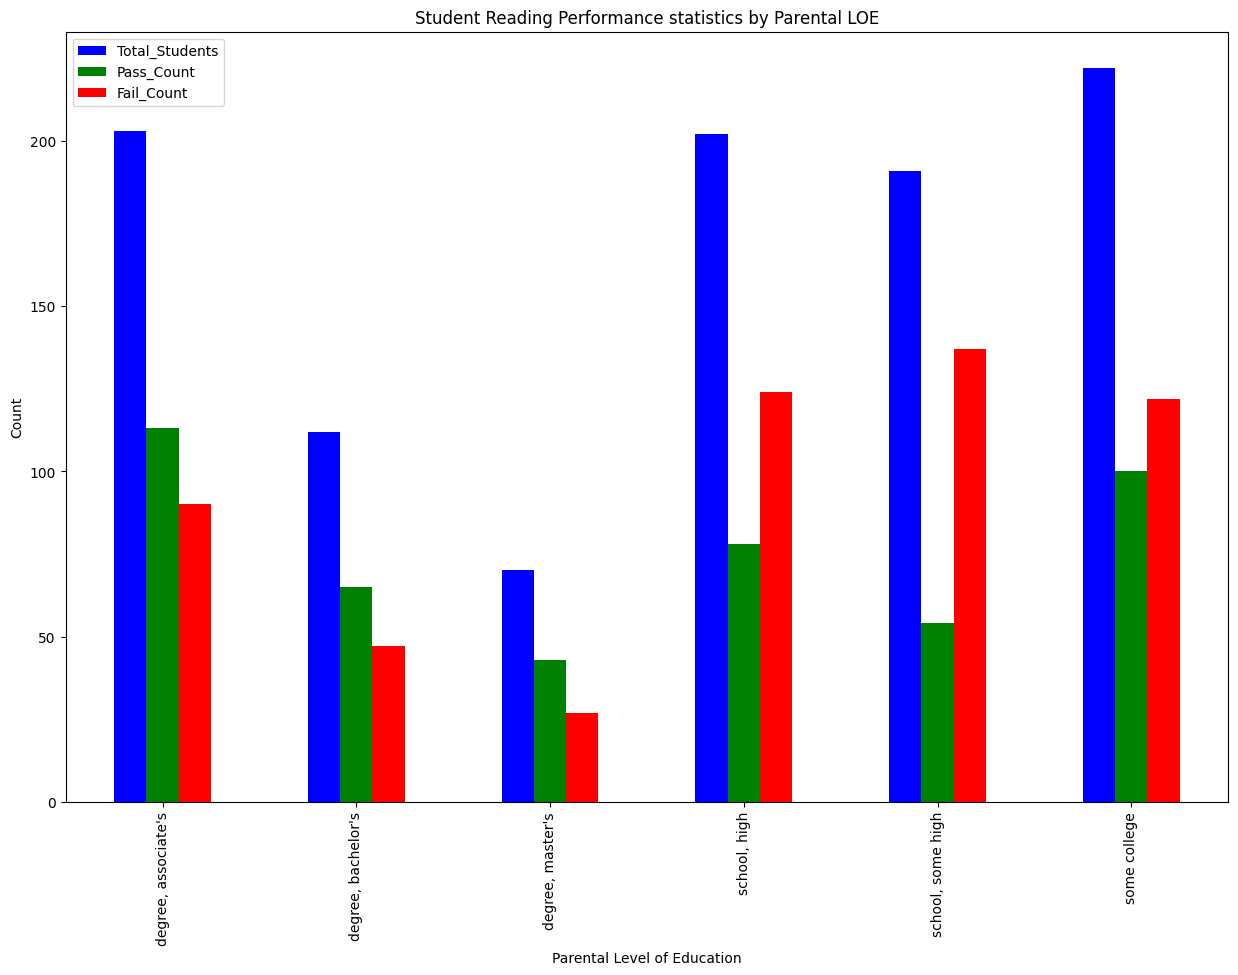

In [14]:
reading_pass_df = df.loc[df['reading_result'] == 'Pass', ['parental level of education', 'final_result']]
reading_pass_df_count = pass_df.groupby(['parental level of education','final_result']).agg(Pass_Count = ('final_result', 'count'))
reading_fail_df = df.loc[df['reading_result'] == 'Fail', ['parental level of education', 'final_result']]
reading_fail_df_count = fail_df.groupby(['parental level of education','final_result']).agg(Fail_Count = ('final_result', 'count'))
plot_chart(combine_dfs(total_df_count, reading_pass_df_count, reading_fail_df_count),
            'Student Reading Performance') 